<div style="text-align: center;margin:10px 0px 0px; padding-top:10px 0px 0px">
<b style="font-size: 36px; font-weight: bold; margin-bottom: 0px; padding-bottom: 0px">Employee Promotion Prediction</b><br>
<b style="font-size: 18px; font-weight: bold; margin-top: 0px; padding-top: 0px">using Decision Tree & Ensemble Learning Algorithms</b>
</div>

<hr style="border-top: 2px solid #333; margin-top: 0px; margin-bottom: 0px">

# Introduction

<div style="display: flex">
    <div style="padding-top: 0px">
        <img src="https://www.nature.com/nature-index/article/image/615b9add4e229320e10253a6" alt="Image" style="margin-top: 5px; width: 1100px; height: 150px;">
    </div>
    <div>
        <p style="text-align: justify; text-justify: inter-word; padding-top: 0px; padding-left: 10px">One of the major problem faced by a multinational company is identifying the right employees for promotion. For this purpose, the company created 2 datasets (for training and testing) with 12 input features and 1 output (for training). Using training dataset containing output, the model is to be created and evaluated. This project showcases the implementation of a decision tree and five ensemble learning algorithms. 
        </p>
    </div>
</div>
<div style="margin-top: 10px">
    <p style="text-align: justify; text-justify: inter-word">
        <b>The goal is to identify the most effective algorithm for determining whether employees in a testing dataset should be promoted.</b>
    </p>
    <p style="text-align: justify; text-justify: inter-word">Here is the feature description for datasets:</p>
</div>

<table>
    <tr>
        <th style="text-align: left">Feature</th>
        <th style="text-align: left">Description</th>
    </tr>
    <tr>
        <td style="text-align: left">employee_id</td>
        <td style="text-align: left">Unique ID for employee</td>
    </tr>
    <tr>
        <td style="text-align: left">department</td>
        <td style="text-align: left">Department of employee</td>
    </tr>
    <tr>
        <td style="text-align: left">region</td>
        <td style="text-align: left">Region of employment (unordered)</td>
    </tr>
    <tr>
        <td style="text-align: left">education</td>
        <td style="text-align: left">Education Level</td>
    </tr>
    <tr>
        <td style="text-align: left">gender</td>
        <td style="text-align: left">Gender of Employee</td>
    </tr>
    <tr>
        <td style="text-align: left">recruitment_channel</td>
        <td style="text-align: left">Channel of recruitment for employee</td>
    </tr>
    <tr>
        <td style="text-align: left">no_of_trainings</td>
        <td style="text-align: left">no of other trainings completed in previous year on soft skills, technical skills etc.</td>
    </tr>
    <tr>
        <td style="text-align: left">age</td>
        <td style="text-align: left">Age of Employee</td>
    </tr>
    <tr>
        <td style="text-align: left">previous_year_rating</td>
        <td style="text-align: left">Employee Rating for the previous year</td>
    </tr>
    <tr>
        <td style="text-align: left">length_of_service</td>
        <td style="text-align: left">Length of service in years</td>
    </tr>
    <tr>
        <td style="text-align: left">awards_won?</td>
        <td style="text-align: left">if awards won during previous year then 1 else 0</td>
    </tr>
    <tr>
        <td style="text-align: left">avg_training_score</td>
        <td style="text-align: left">Average score in current training evaluations</td>
    </tr>
    <tr>
        <td style="text-align: left">is_promoted</td>
        <td style="text-align: left">Recommended for promotion</td>
    </tr>
</table>

In [1]:
# basic libraries
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# sklearn library and imports
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
# library for model saving
import joblib

In [5]:
# other imports
import warnings
warnings.filterwarnings('ignore')

# 1. Data Loading

In [6]:
# read csv files
df_train = pd.read_csv("datasets/train.csv")
df_test = pd.read_csv("datasets/test.csv")

# 2. Data Preprocessing

## 2.1. General Data Exploration

In [7]:
# top 10 rows of df_train
df_train.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,0,54,0


In [8]:
# top 10 rows of df_test
df_test.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,0,76


In [9]:
# check rows and columns
print(df_train.shape)
print(df_test.shape)

(54808, 13)
(23490, 12)


In [10]:
# checking null values, count and datatypes in df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [11]:
# checking null values, count and datatypes in df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [12]:
# check statistics of non-boolean df_train features
df_train.drop(['employee_id', 'awards_won?', 'is_promoted'], axis=1).describe()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,63.386750
std,0.609264,7.660169,1.259993,4.265094,13.371559
min,1.000000,20.000000,1.000000,1.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,76.000000
max,10.000000,60.000000,5.000000,37.000000,99.000000


In [13]:
# check statistics of non-boolean df_test features
df_test.drop(['employee_id', 'awards_won?'], axis=1).describe()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
count,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000
mean,1.254236,34.782929,3.339146,5.810387,63.263133
std,0.600910,7.679492,1.263294,4.207917,13.411750
min,1.000000,20.000000,1.000000,1.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,76.000000
max,9.000000,60.000000,5.000000,34.000000,99.000000


## 2.2. Handling Missing Values

In [14]:
# check missing values in df_train
df_train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [15]:
# check missing values of df_test
df_test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

In [16]:
# check value counts for education
print(df_train['education'].value_counts())
print(df_test['education'].value_counts())

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64
education
Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: count, dtype: int64


In [17]:
# replace null values in education by mode
df_train['education'].fillna(df_train['education'].mode()[0], inplace=True)
df_test['education'].fillna(df_test['education'].mode()[0], inplace=True)

In [18]:
# check value counts for previous_year_rating
print(df_train['previous_year_rating'].value_counts())
print(df_test['previous_year_rating'].value_counts())

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64
previous_year_rating
3.0    7921
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: count, dtype: int64


In [19]:
# replace null values in previous_year_rating by mode
df_train['previous_year_rating'].fillna(df_train['previous_year_rating'].mode()[0], inplace=True)
df_test['previous_year_rating'].fillna(df_test['previous_year_rating'].mode()[0], inplace=True)

## 2.3. Handling Duplicates

In [20]:
# check duplicates of df_train
print(len(df_train))
print(len(df_train.drop_duplicates()))

54808
54808


In [21]:
# check duplicates of df_test
print(len(df_test))
print(len(df_test.drop_duplicates()))

23490
23490


In [22]:
# drop duplicates of df_train
df_train = df_train.drop_duplicates()

In [23]:
# drop duplicates of df_test
df_test = df_test.drop_duplicates()

## 2.4. Handling Outliers

In [24]:
# define columns for distribution
dist_cols = ['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']

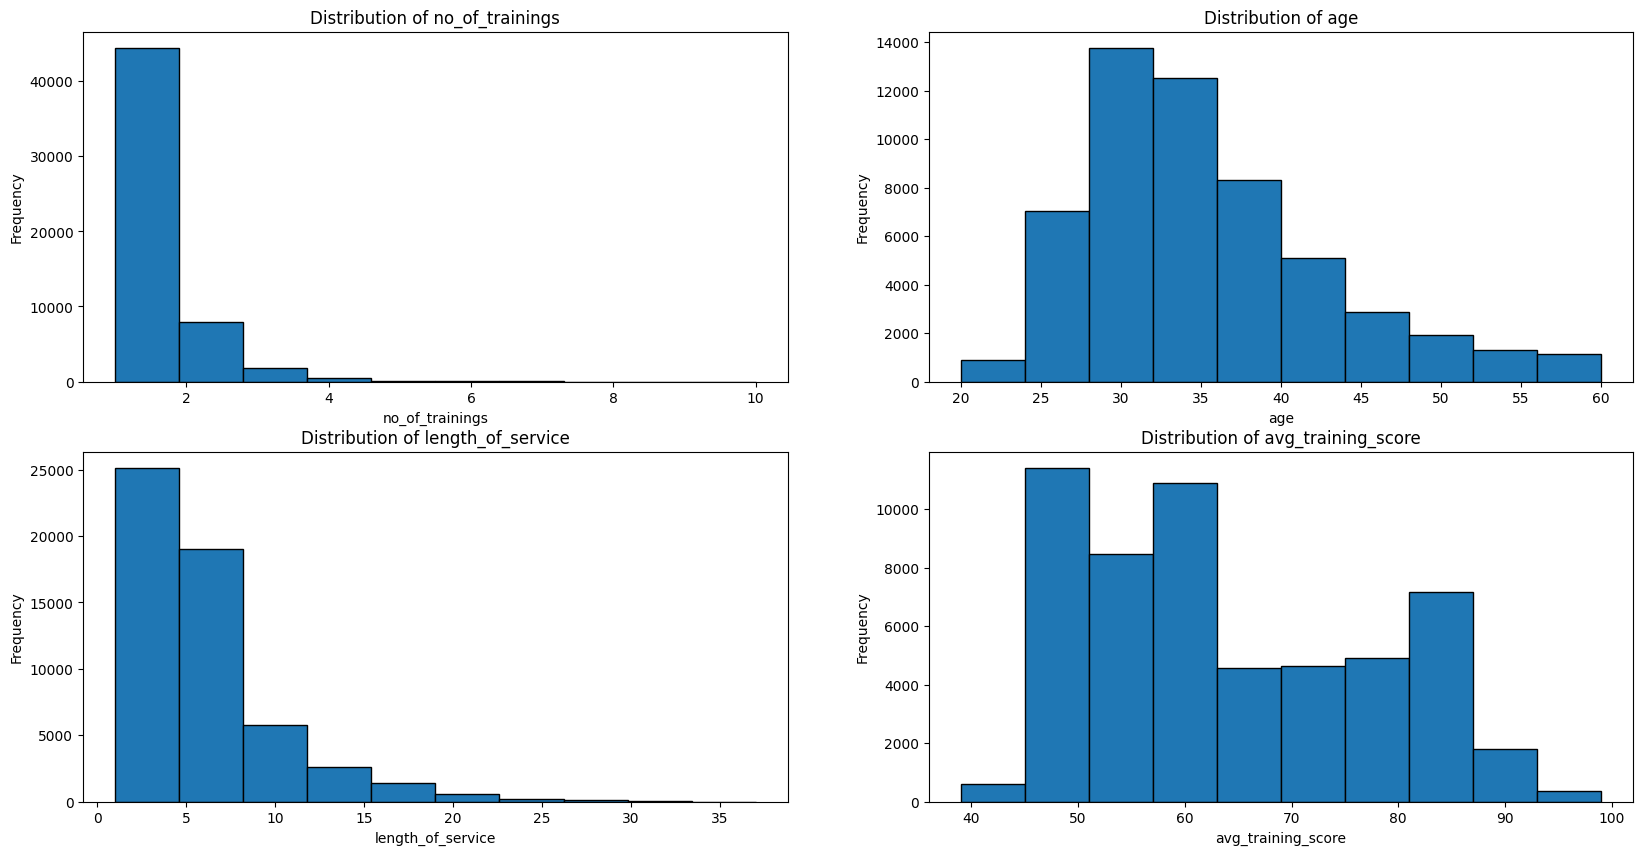

In [25]:
# histogram for outliers in df_train
i = 1
plt.figure(figsize=(20, 10))
for col in dist_cols:
    plt.subplot(2, 2, i)
    plt.hist(df_train[col], bins=10, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    i += 1
plt.show()

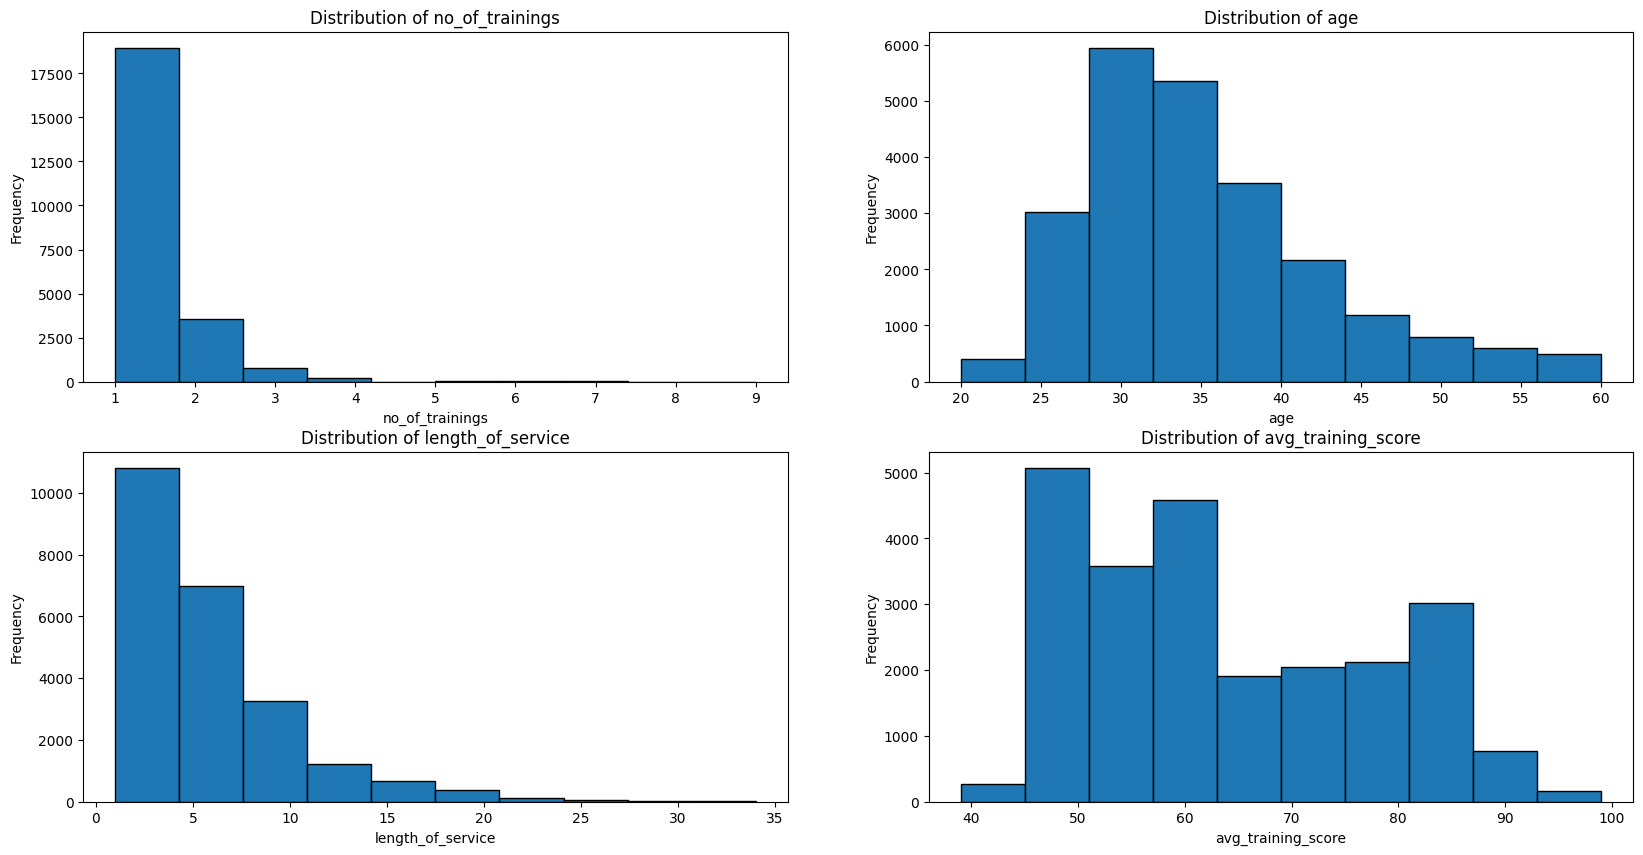

In [26]:
# histogram plot for outliers in df_test
i = 1
plt.figure(figsize=(20, 10))
for col in dist_cols:
    plt.subplot(2, 2, i)
    plt.hist(df_test[col], bins=10, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    i += 1
plt.show()

## 2.5. Index Removal

In [27]:
# remove employee_id from both dataframes
df_train.drop(['employee_id'], axis=1, inplace=True)
df_test.drop(['employee_id'], axis=1, inplace=True)

## 2.6. Checking Feature Values

In [28]:
# check unique values for all columns in df_train
for col in df_train.columns:
    print(col)
    print(f"Values: \n{df_train[col].unique()}")
    print(f"Number of Values: {len(df_train[col].unique())}")
    print(f"Datatype: {df_train[col].dtype}")
    print("=========================================")

department
Values: 
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
Number of Values: 9
Datatype: object
region
Values: 
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
Number of Values: 34
Datatype: object
education
Values: 
["Master's & above" "Bachelor's" 'Below Secondary']
Number of Values: 3
Datatype: object
gender
Values: 
['f' 'm']
Number of Values: 2
Datatype: object
recruitment_channel
Values: 
['sourcing' 'other' 'referred']
Number of Values: 3
Datatype: object
no_of_trainings
Values: 
[ 1  2  3  4  7  5  6  8 10  9]
Number of Values: 10
Datatype: int64
age
Values: 
[35

In [29]:
# check unique values for all columns in df_test
for col in df_test.columns:
    print(col)
    print(f"Values: \n{df_test[col].unique()}")
    print(f"Number of Values: {len(df_test[col].unique())}")
    print(f"Datatype: {df_test[col].dtype}")
    print("=========================================")

department
Values: 
['Technology' 'HR' 'Sales & Marketing' 'Procurement' 'Finance' 'Analytics'
 'Operations' 'Legal' 'R&D']
Number of Values: 9
Datatype: object
region
Values: 
['region_26' 'region_4' 'region_13' 'region_2' 'region_29' 'region_7'
 'region_22' 'region_16' 'region_17' 'region_24' 'region_11' 'region_27'
 'region_9' 'region_20' 'region_34' 'region_23' 'region_8' 'region_14'
 'region_31' 'region_19' 'region_5' 'region_28' 'region_15' 'region_3'
 'region_25' 'region_12' 'region_21' 'region_30' 'region_10' 'region_33'
 'region_32' 'region_6' 'region_1' 'region_18']
Number of Values: 34
Datatype: object
education
Values: 
["Bachelor's" "Master's & above" 'Below Secondary']
Number of Values: 3
Datatype: object
gender
Values: 
['m' 'f']
Number of Values: 2
Datatype: object
recruitment_channel
Values: 
['sourcing' 'other' 'referred']
Number of Values: 3
Datatype: object
no_of_trainings
Values: 
[1 3 2 4 5 7 6 8 9]
Number of Values: 9
Datatype: int64
age
Values: 
[24 31 30 36 33 

## 2.7. Conversion of Datatypes

In [30]:
# convert previous_year_rating to int64
df_train['previous_year_rating'] = df_train['previous_year_rating'].astype(np.int64)
df_test['previous_year_rating'] = df_test['previous_year_rating'].astype(np.int64)

In [31]:
# checking preprocessed df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   department            54808 non-null  object
 1   region                54808 non-null  object
 2   education             54808 non-null  object
 3   gender                54808 non-null  object
 4   recruitment_channel   54808 non-null  object
 5   no_of_trainings       54808 non-null  int64 
 6   age                   54808 non-null  int64 
 7   previous_year_rating  54808 non-null  int64 
 8   length_of_service     54808 non-null  int64 
 9   awards_won?           54808 non-null  int64 
 10  avg_training_score    54808 non-null  int64 
 11  is_promoted           54808 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 5.0+ MB


In [32]:
# checking preprocessed df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   department            23490 non-null  object
 1   region                23490 non-null  object
 2   education             23490 non-null  object
 3   gender                23490 non-null  object
 4   recruitment_channel   23490 non-null  object
 5   no_of_trainings       23490 non-null  int64 
 6   age                   23490 non-null  int64 
 7   previous_year_rating  23490 non-null  int64 
 8   length_of_service     23490 non-null  int64 
 9   awards_won?           23490 non-null  int64 
 10  avg_training_score    23490 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


# 3. Exploratory Data Analysis

## 3.1. Frequency Distribution of Target Feature

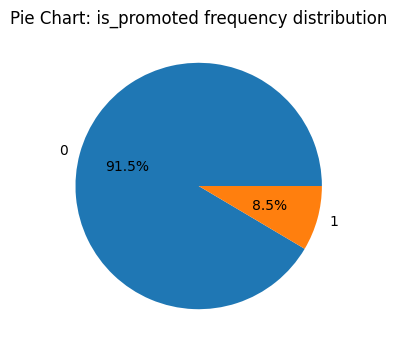

In [33]:
# check value counts of is_promoted 
counter = Counter(df_train['is_promoted'])
plt.figure(figsize=(4, 4))
plt.pie(list(counter.values()), labels=list(counter.keys()), autopct="%1.1f%%")
plt.title('Pie Chart: is_promoted frequency distribution')
plt.show()

**Observation:** There is 91.5% of employees not promoted compared to minor 8.5% promoted. For EDA and further analysis, oversampling is important.

## 3.2. Oversampling

In [34]:
# dividing minority and majority classes
minority_class = df_train[df_train['is_promoted'] == 1]
majority_class = df_train[df_train['is_promoted'] == 0]

In [35]:
# oversample minority class
oversampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

In [36]:
# combine majority class with oversampled minority class
odf_train = pd.concat([majority_class, oversampled_minority])

## 3.3. Data Visualizations after Oversampling

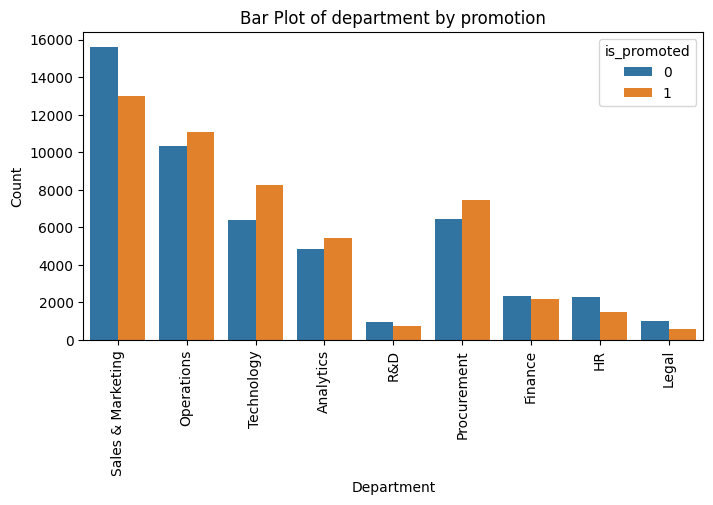

In [37]:
# department vs is_promoted count plot
plt.figure(figsize=(8, 4))
sns.countplot(x='department', hue='is_promoted', data=odf_train)
plt.title('Bar Plot of department by promotion')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='is_promoted', labels=[0, 1])
plt.show()

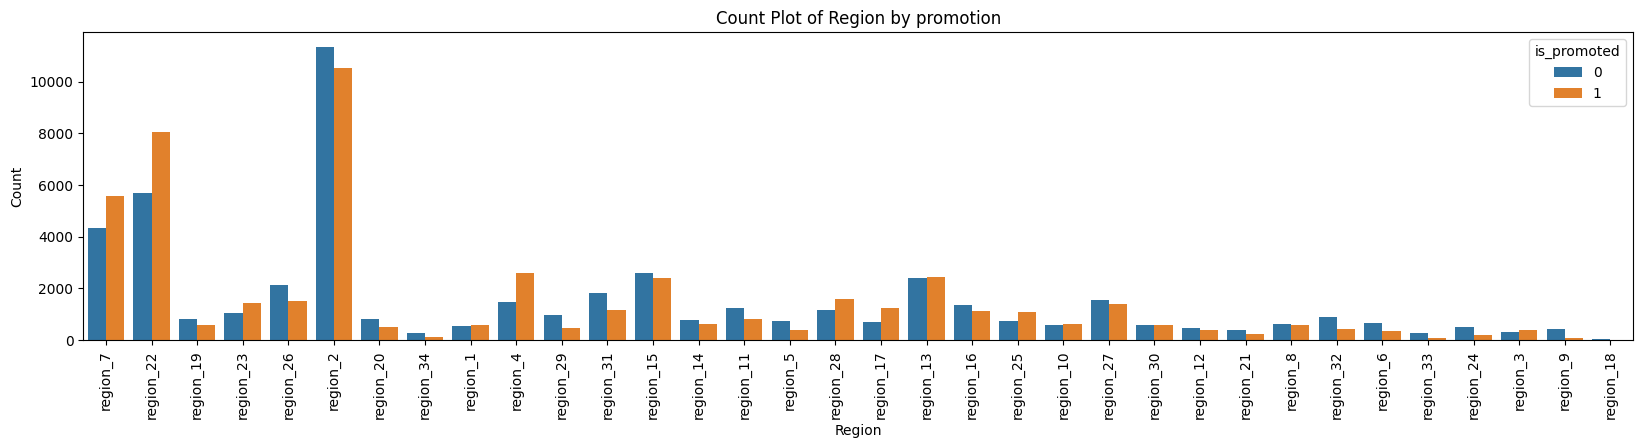

In [38]:
# region vs is_promoted
plt.figure(figsize=(20, 4))
sns.countplot(x='region', hue='is_promoted', data=odf_train)
plt.title('Count Plot of Region by promotion')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='is_promoted', labels=[0, 1])
plt.show()

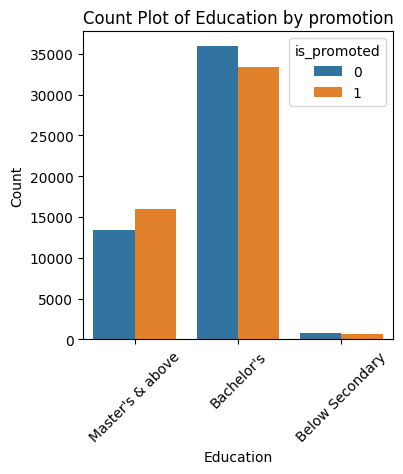

In [39]:
# education vs is_promoted count plot
plt.figure(figsize=(4, 4))
sns.countplot(x='education', hue='is_promoted', data=odf_train)
plt.title('Count Plot of Education by promotion')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='is_promoted', labels=[0, 1])
plt.show()

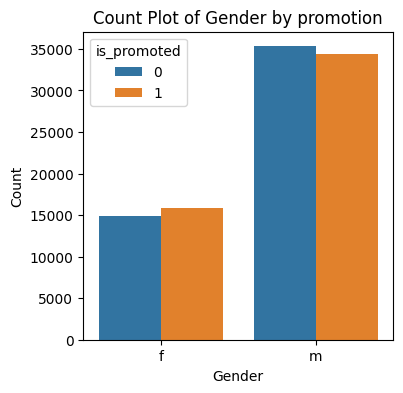

In [40]:
# gender vs is_promoted count plot
plt.figure(figsize=(4, 4))
sns.countplot(x='gender', hue='is_promoted', data=odf_train)
plt.title('Count Plot of Gender by promotion')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks()
plt.legend(title='is_promoted', labels=[0, 1])
plt.show()

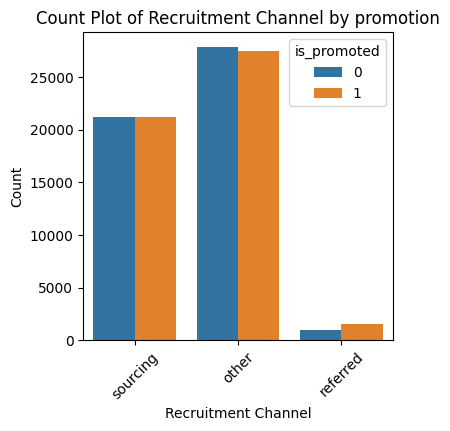

In [41]:
# recruitment_channel vs is_promoted count plot
plt.figure(figsize=(4, 4))
sns.countplot(x='recruitment_channel', hue='is_promoted', data=odf_train)
plt.title('Count Plot of Recruitment Channel by promotion')
plt.xlabel('Recruitment Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='is_promoted', labels=[0, 1])
plt.show()

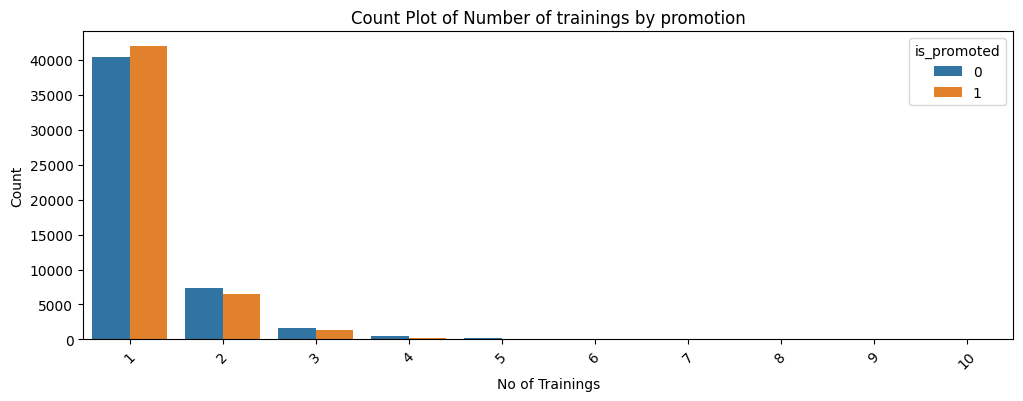

In [42]:
# no_of_trainings vs is_promoted count plot
plt.figure(figsize=(12, 4))
sns.countplot(x='no_of_trainings', hue='is_promoted', data=odf_train)
plt.title('Count Plot of Number of trainings by promotion')
plt.xlabel('No of Trainings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='is_promoted', labels=[0, 1])
plt.show()

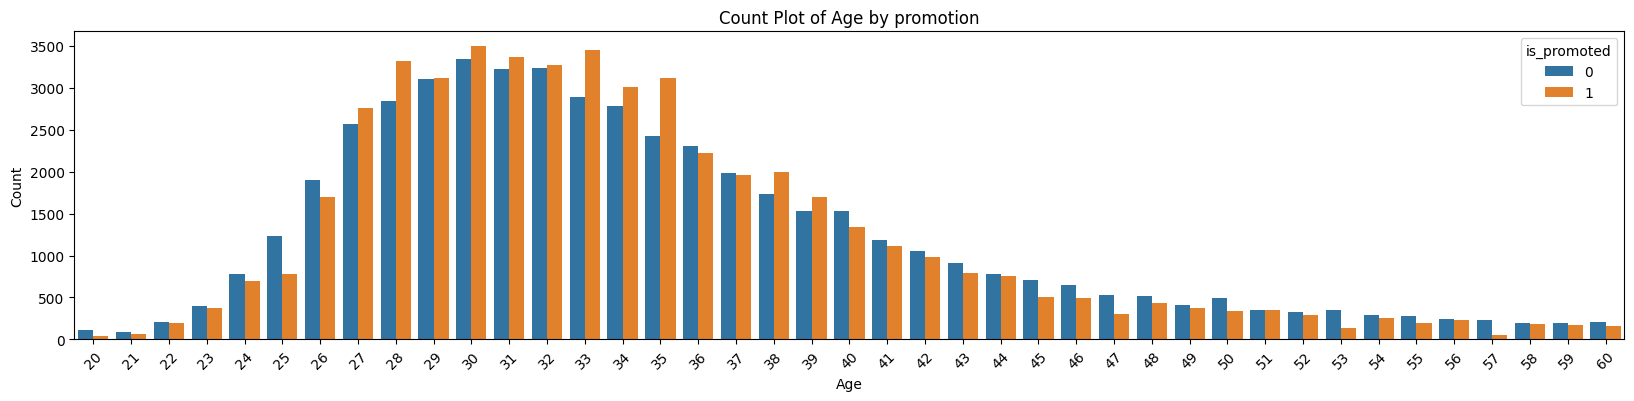

In [43]:
# age vs is_promoted count plot
plt.figure(figsize=(20, 4))
sns.countplot(x='age', hue='is_promoted', data=odf_train)
plt.title('Count Plot of Age by promotion')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='is_promoted', labels=[0, 1])
plt.show()

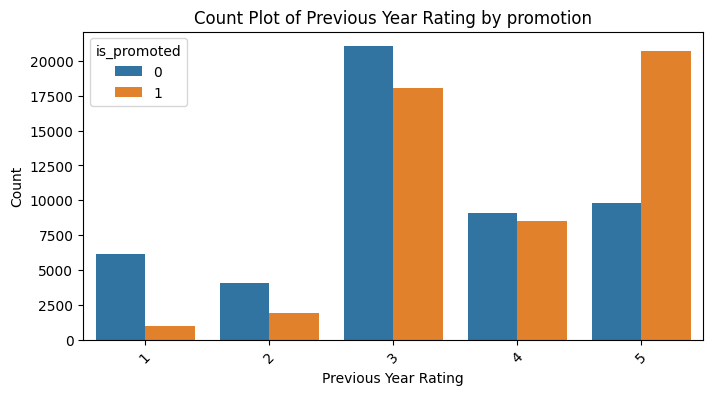

In [44]:
# previous_year_rating vs is_promoted count plot
plt.figure(figsize=(8, 4))
sns.countplot(x='previous_year_rating', hue='is_promoted', data=odf_train)
plt.title('Count Plot of Previous Year Rating by promotion')
plt.xlabel('Previous Year Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='is_promoted', labels=[0, 1])
plt.show()

**Observation:** Employees with 1 previous year rating has minority being promoted which increases upto 5.

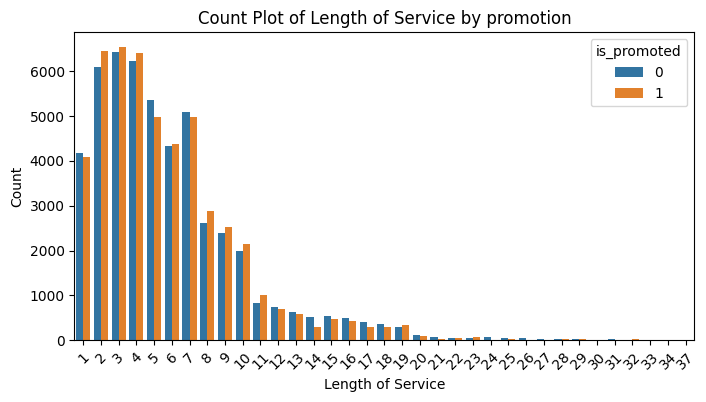

In [45]:
# length_of_service vs is_promoted count plot
plt.figure(figsize=(8, 4))
sns.countplot(x='length_of_service', hue='is_promoted', data=odf_train)
plt.title('Count Plot of Length of Service by promotion')
plt.xlabel('Length of Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='is_promoted', labels=[0, 1])
plt.show()

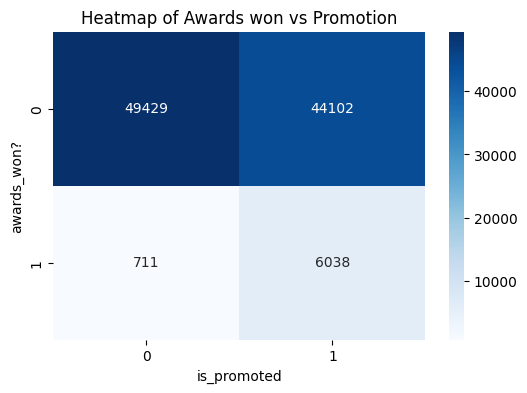

In [46]:
# awards_won? vs is_promoted count based heatmap
plt.figure(figsize=(6, 4))
pivot_table = odf_train.pivot_table(index='awards_won?', columns='is_promoted', aggfunc='size')
sns.heatmap(pivot_table, annot=True, cmap='Blues', cbar=True, fmt='g')
plt.title('Heatmap of Awards won vs Promotion')
plt.xlabel('is_promoted')
plt.ylabel('awards_won?')
plt.show()

**Observation:**  For no award winners, nearly equal % of employees are promoted and not promoted. Whereas award winners, there is more distinction as high % of employees are promoted.

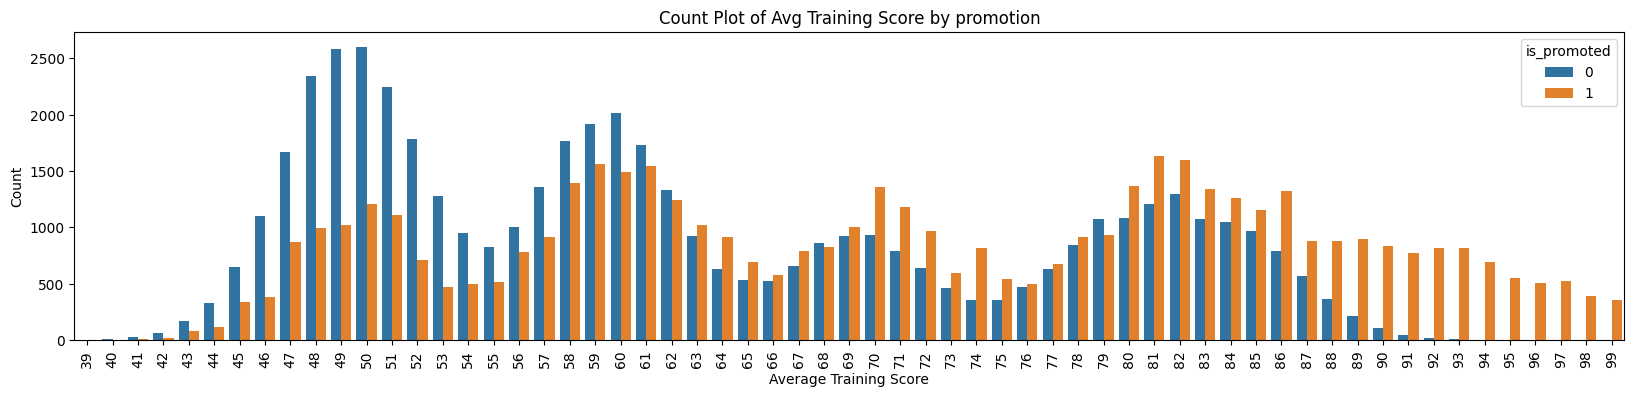

In [47]:
# avg_training_score vs is_promoted count plot
plt.figure(figsize=(20, 4))
sns.countplot(x='avg_training_score', hue='is_promoted', data=odf_train)
plt.title('Count Plot of Avg Training Score by promotion')
plt.xlabel('Average Training Score')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='is_promoted', labels=[0, 1])
plt.show()

**Observation:**  Employees with high avg. training score tends to be more promoted and those with low stay more not promoted.

**Results:**  'previous_year_rating', 'awards_won?' and 'avg_training_score' have high relationship with target variable 'is_promoted'.

# 4. Feature Engineering

## 4.1. Label Encoding

In [48]:
# define mappings
education_mapping = {"Below Secondary": 0, "Bachelor's": 1, "Master's & above": 2}
gender_mapping = {"m": 0, "f": 1}

In [49]:
# apply mapping for education
odf_train['education'] = odf_train['education'].map(education_mapping)
df_test['education'] = df_test['education'].map(education_mapping)

In [50]:
# apply mapping for gender
odf_train['gender'] = odf_train['gender'].map(gender_mapping)
df_test['gender'] = df_test['gender'].map(gender_mapping)

## 4.2. One-Hot Encoding

In [51]:
# columns for one-hot encoding
ohe_columns = ['department', 'region', 'recruitment_channel']

In [52]:
# define one-hot encoder
ohe = OneHotEncoder(sparse_output=False)

In [53]:
# encode data of ohe_columns
df_test_transformed = ohe.fit_transform(df_test[ohe_columns])
odf_train_transformed = ohe.transform(odf_train[ohe_columns])

In [54]:
# convert array to dataframes
odf_train_encoded = pd.DataFrame(odf_train_transformed, columns=ohe.get_feature_names_out(ohe_columns))
df_test_encoded = pd.DataFrame(df_test_transformed, columns=ohe.get_feature_names_out(ohe_columns))

In [55]:
# reset indexes
odf_train = odf_train.reset_index(drop=True)
odf_train_encoded = odf_train_encoded.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_test_encoded = df_test_encoded.reset_index(drop=True)

In [56]:
# concatenate original df and encoded df
odf_train = pd.concat([odf_train, odf_train_encoded], axis=1)
df_test = pd.concat([df_test, df_test_encoded], axis=1)

## 4.3. Handling New Columns

In [57]:
# checking odf_train
odf_train.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,Sales & Marketing,region_7,2,1,sourcing,1,35,5,8,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Operations,region_22,1,0,other,1,30,5,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Sales & Marketing,region_19,1,0,sourcing,1,34,3,7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Sales & Marketing,region_23,1,0,other,2,39,1,10,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Technology,region_26,1,0,other,1,45,3,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,Analytics,region_2,1,0,sourcing,2,31,3,7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,Operations,region_20,1,1,other,1,31,3,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Operations,region_34,2,0,sourcing,1,33,3,6,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,Analytics,region_20,1,0,other,1,28,4,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,Sales & Marketing,region_1,2,0,sourcing,1,32,5,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
# checking df_test
df_test.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,Technology,region_26,1,0,sourcing,1,24,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,HR,region_4,1,1,other,1,31,3,5,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Sales & Marketing,region_13,1,0,other,1,31,1,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Procurement,region_2,1,1,other,3,31,2,9,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Finance,region_29,1,0,sourcing,1,30,4,7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,Procurement,region_7,1,0,sourcing,1,36,3,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,Finance,region_2,1,0,other,1,33,5,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Analytics,region_22,1,0,sourcing,2,36,3,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,Technology,region_7,2,0,other,1,51,4,11,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,Technology,region_22,1,0,sourcing,1,29,5,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
# checking null values and datatypes of odf_train
odf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100280 entries, 0 to 100279
Data columns (total 58 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   department                    100280 non-null  object 
 1   region                        100280 non-null  object 
 2   education                     100280 non-null  int64  
 3   gender                        100280 non-null  int64  
 4   recruitment_channel           100280 non-null  object 
 5   no_of_trainings               100280 non-null  int64  
 6   age                           100280 non-null  int64  
 7   previous_year_rating          100280 non-null  int64  
 8   length_of_service             100280 non-null  int64  
 9   awards_won?                   100280 non-null  int64  
 10  avg_training_score            100280 non-null  int64  
 11  is_promoted                   100280 non-null  int64  
 12  department_Analytics          100280 non-nul

In [60]:
# checking null values and datatypes of df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   department                    23490 non-null  object 
 1   region                        23490 non-null  object 
 2   education                     23490 non-null  int64  
 3   gender                        23490 non-null  int64  
 4   recruitment_channel           23490 non-null  object 
 5   no_of_trainings               23490 non-null  int64  
 6   age                           23490 non-null  int64  
 7   previous_year_rating          23490 non-null  int64  
 8   length_of_service             23490 non-null  int64  
 9   awards_won?                   23490 non-null  int64  
 10  avg_training_score            23490 non-null  int64  
 11  department_Analytics          23490 non-null  float64
 12  department_Finance            23490 non-null  float64
 13  d

In [61]:
# get rid of all rows with null values
odf_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [62]:
# convert datatypes and names of new columns in odf_train
for col in ohe_columns:
    for val in odf_train[col].unique():
        temp_col = str(col) + "_" + str(val)
        odf_train[temp_col] = odf_train[temp_col].astype(np.int64)
        odf_train.rename(columns={temp_col: val}, inplace=True)

In [63]:
# convert datatypes and names of new columns in df_test
for col in ohe_columns:
    for val in df_test[col].unique():
        temp_col = str(col) + "_" + str(val)
        df_test[temp_col] = df_test[temp_col].astype(np.int64)
        df_test.rename(columns={temp_col: val}, inplace=True)

## 4.4. Handling Unnecessary Columns

In [64]:
# drop columns used in One-hot encoding
odf_train.drop(ohe_columns, axis=1, inplace=True)
df_test.drop(ohe_columns, axis=1, inplace=True)

In [65]:
# check unnecessary columns
print(odf_train.columns)
print(df_test.columns)

Index(['education', 'gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted',
       'Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
       'R&D', 'Sales & Marketing', 'Technology', 'region_1', 'region_10',
       'region_11', 'region_12', 'region_13', 'region_14', 'region_15',
       'region_16', 'region_17', 'region_18', 'region_19', 'region_2',
       'region_20', 'region_21', 'region_22', 'region_23', 'region_24',
       'region_25', 'region_26', 'region_27', 'region_28', 'region_29',
       'region_3', 'region_30', 'region_31', 'region_32', 'region_33',
       'region_34', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9', 'other', 'referred', 'sourcing'],
      dtype='object')
Index(['education', 'gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score', 'Analytics',
       'Finance', 'H

## 4.5. Feature Scaling

In [66]:
# columns for min max scaling
mm_scaler_cols = dist_cols + ['education', 'previous_year_rating']
print(mm_scaler_cols)

['no_of_trainings', 'age', 'length_of_service', 'avg_training_score', 'education', 'previous_year_rating']


In [67]:
# check statistics for odf_train
odf_train.describe()

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,Analytics,...,region_34,region_4,region_5,region_6,region_7,region_8,region_9,other,referred,sourcing
count,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,...,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000
mean,1.278969,0.305525,1.229876,34.607190,3.583556,5.792002,0.067302,66.996550,0.500000,0.102333,...,0.003879,0.040497,0.011288,0.009932,0.098913,0.011957,0.004896,0.551955,0.025080,0.422966
std,0.479777,0.460632,0.566950,7.402226,1.181526,4.143772,0.250545,14.543455,0.500002,0.303088,...,0.062162,0.197122,0.105646,0.099165,0.298547,0.108691,0.069802,0.497296,0.156368,0.494033
min,0.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,33.000000,3.000000,5.000000,0.000000,64.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,38.000000,5.000000,7.000000,0.000000,80.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2.000000,1.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
# check statistics for df_test
df_test.describe()

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,Analytics,Finance,...,region_34,region_4,region_5,region_6,region_7,region_8,region_9,other,referred,sourcing
count,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,...,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,1.260962,0.293487,1.254236,34.782929,3.312984,5.810387,0.022776,63.263133,0.098723,0.046445,...,0.006599,0.032993,0.014559,0.012686,0.084376,0.011452,0.007663,0.556748,0.019200,0.424053
std,0.474040,0.455369,0.600910,7.679492,1.216959,4.207917,0.149191,13.411750,0.298296,0.210452,...,0.080965,0.178621,0.119783,0.111919,0.277957,0.106400,0.087203,0.496780,0.137229,0.494209
min,0.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2.000000,1.000000,9.000000,60.000000,5.000000,34.000000,1.000000,99.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
# define scaler
mm_scaler = MinMaxScaler()

In [70]:
# scale mm_scaler_cols
odf_train_scaled = mm_scaler.fit_transform(odf_train[mm_scaler_cols])
df_test_scaled = mm_scaler.transform(df_test[mm_scaler_cols])

In [71]:
# apply scaled data to original datasets
odf_train[mm_scaler_cols] = pd.DataFrame(odf_train_scaled, columns=mm_scaler_cols)
df_test[mm_scaler_cols] = pd.DataFrame(df_test_scaled, columns=mm_scaler_cols)

## 4.6. Feature Selection

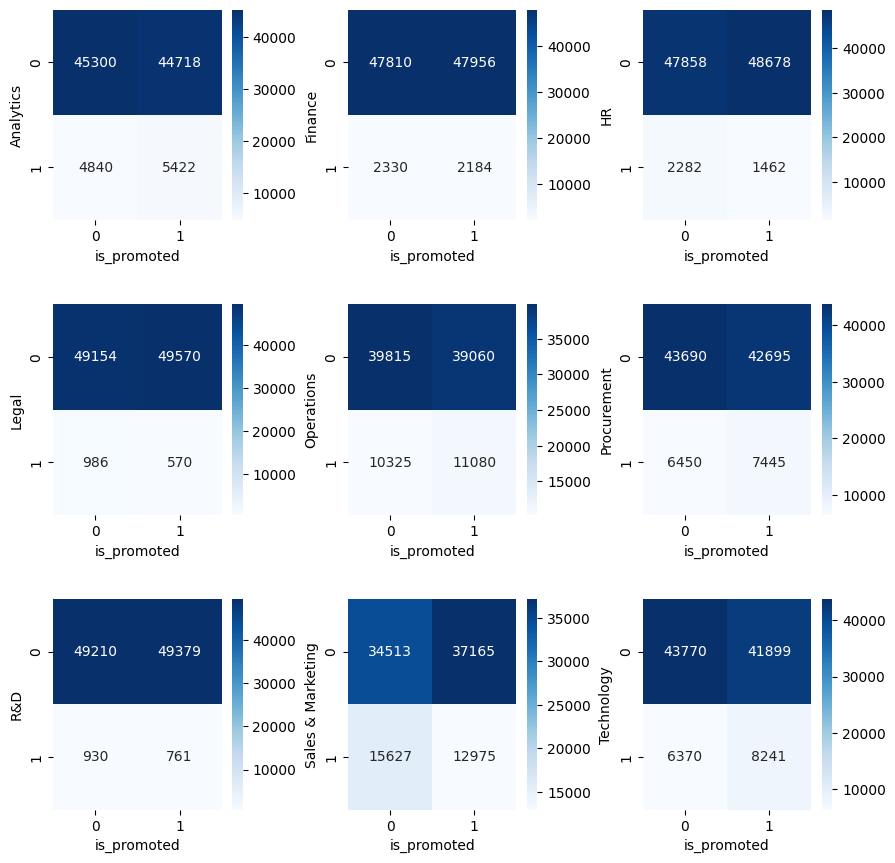

In [72]:
# checking relationships of different departments to is_promoted
departments = ['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement', 'R&D', 'Sales & Marketing', 'Technology']
i = 1
plt.figure(figsize=(10, 10))
for col in departments:
    plt.subplot(3, 3, i)
    pivot_table = odf_train.pivot_table(index=col, columns='is_promoted', aggfunc='size')
    sns.heatmap(pivot_table, annot=True, cmap='Blues', cbar=True, fmt='g')
    plt.xlabel('is_promoted', fontsize=10)
    plt.ylabel(col, fontsize=10)
    i += 1
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

**Observation:** HR, Legal, Sales & Marketing and Technology are 2 departments that look highly correlated to promotion. Most employees in these 2 departments don't receive promotion. Whereas, those from Sales & Marketing and Technology have inversely proportional relationship to 'is_promoted'.

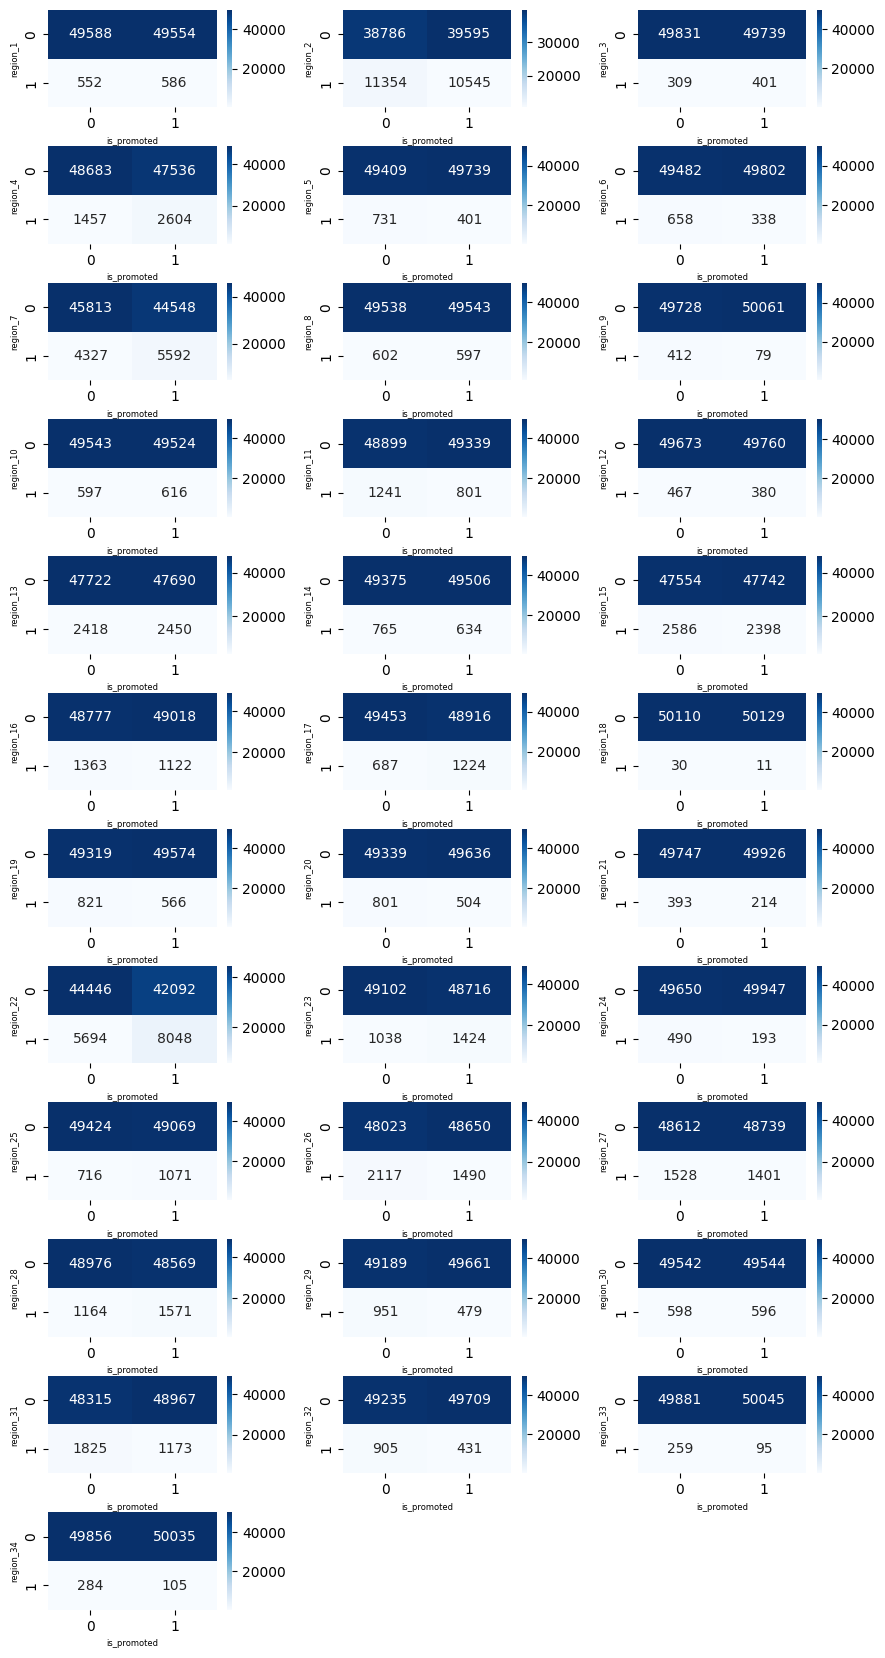

In [73]:
# checking relationships of different regions to is_promoted
regions = ['region_1', 'region_2','region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
           'region_9', 'region_10', 'region_11', 'region_12', 'region_13', 'region_14', 'region_15', 'region_16',
           'region_17', 'region_18', 'region_19', 'region_20', 'region_21', 'region_22', 'region_23', 'region_24',
           'region_25', 'region_26', 'region_27', 'region_28', 'region_29', 'region_30', 'region_31', 'region_32',
           'region_33', 'region_34']
i = 1
plt.figure(figsize=(10, 20))
for col in regions:
    plt.subplot(12, 3, i)
    pivot_table = odf_train.pivot_table(index=col, columns='is_promoted', aggfunc='size')
    sns.heatmap(pivot_table, annot=True, cmap='Blues', cbar=True, fmt='g')
    plt.xlabel('is_promoted', fontsize=6)
    plt.ylabel(col, fontsize=6)
    i += 1
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

**Observation:** Employees from regions 3-7, 9, 11, 12, 17, 18-26, 28, 29 and 31-34 have high
correlation to promotion.

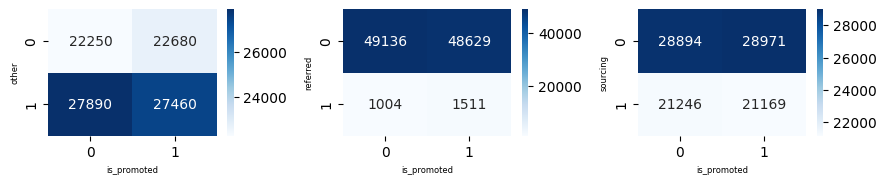

In [74]:
# checking relationships of different recruitment_channels to is_promoted
recruitment_channels = ['other', 'referred', 'sourcing']
i = 1
plt.figure(figsize=(10, 6))
for col in recruitment_channels:
    plt.subplot(3, 3, i)
    pivot_table = odf_train.pivot_table(index=col, columns='is_promoted', aggfunc='size')
    sns.heatmap(pivot_table, annot=True, cmap='Blues', cbar=True, fmt='g')
    plt.xlabel('is_promoted', fontsize=6)
    plt.ylabel(col, fontsize=6)
    i += 1
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

**Observation:** Referred employees enjoy high correlation.

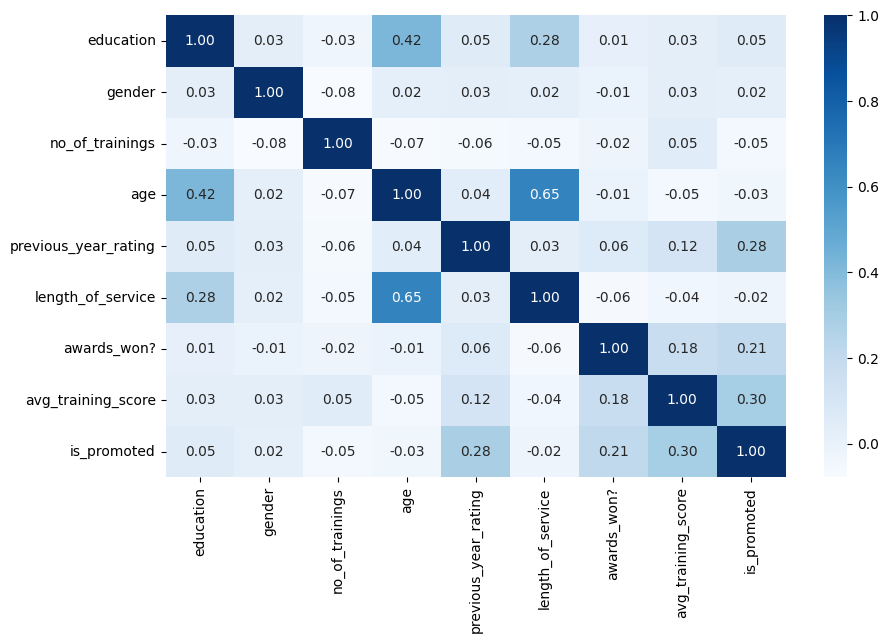

In [75]:
# checking relationships of other features to is_promoted
df_train_others = odf_train[['education', 'gender', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted']]
plt.figure(figsize=(10, 6))
sns.heatmap(df_train_others.corr(), annot=True, fmt=".2f", cmap='Blues')
plt.show()

**Observation:** 'previous_year_rating', 'length_of_service' and 'avg_training_score' are correlated with 'is_promoted'.

In [76]:
# defining most important features
important_features = [
 'HR', 'Legal', 'Sales & Marketing', 'Technology',
 'region_3', 'region_4', 'region_5', 'region_6', 'region_7',
 'region_9', 'region_11', 'region_12', 'region_17',
 'region_18', 'region_19', 'region_20', 'region_21', 'region_22', 'region_23', 'region_24', 'region_25', 'region_26',
 'region_28', 'region_29',
 'region_31', 'region_32', 'region_33', 'region_34',
 'referred',
 'previous_year_rating', 'length_of_service', 'avg_training_score'
]

# 5. Train Test Split

In [77]:
# define X and y
X = odf_train[important_features]
y = odf_train['is_promoted']

In [78]:
# splitting data after stratification into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [79]:
# replace null values by 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# 6. Model Building and Evaluation

In [80]:
# defining empty dictionary for comparing evaluation
evaluation = dict()

## 6.1. Decision Tree Classifier

In [81]:
# defining classifier
dt_classifier = DecisionTreeClassifier(min_samples_split=10,max_depth=3)

In [82]:
# model fitting
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [83]:
# model prediction
y_pred = dt_classifier.predict(X_test)

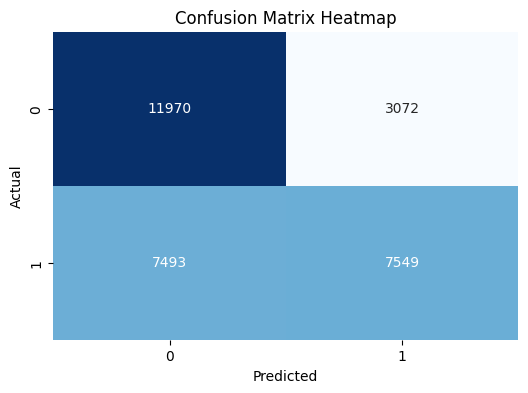

In [84]:
# confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [85]:
# evaluation metrics
evaluation['dt_classifier'] = {
    'classification_report': classification_report(y_test, y_pred),
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1_score': f1_score(y_test, y_pred)
}

## 6.2. Bagging Classifier

In [86]:
# defining classifier
bg_classifier = BaggingClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=3),max_samples=0.5,max_features=1.0,n_estimators=10)

In [87]:
# model fitting
bg_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                   min_samples_split=10),
                  max_samples=0.5)

In [88]:
# model prediction
y_pred = bg_classifier.predict(X_test)

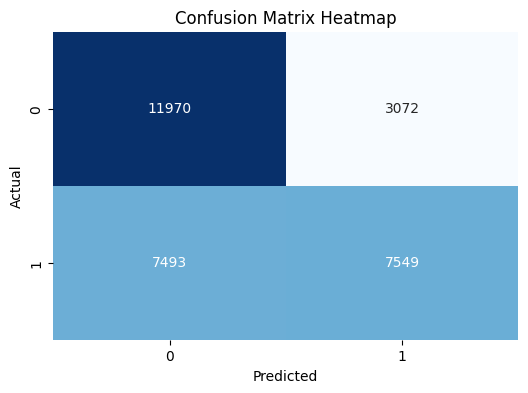

In [89]:
# confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [90]:
# evaluation metrics
evaluation['bg_classifier'] = {
    'classification_report': classification_report(y_test, y_pred),
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1_score': f1_score(y_test, y_pred)
}

# 6.3. AdaBoost Classifier

In [91]:
# defining classifier
adab_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=100,learning_rate=0.5)

In [92]:
# model fitting
adab_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=100)

In [93]:
# model prediction
y_pred = adab_classifier.predict(X_test)

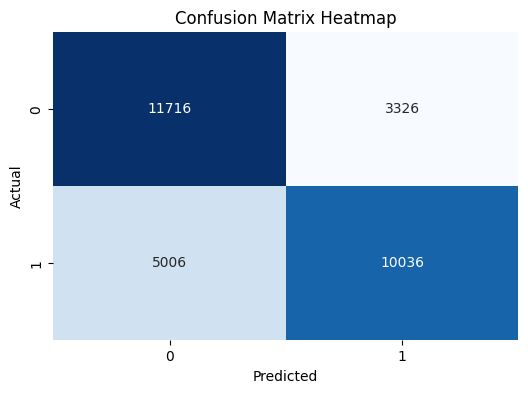

In [94]:
# confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [95]:
# evaluation metrics
evaluation['adab_classifier'] = {
    'classification_report': classification_report(y_test, y_pred),
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1_score': f1_score(y_test, y_pred)
}

# 6.4. Gradient Boosting Classifier

In [96]:
# defining classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100)

In [97]:
# model fitting
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [98]:
# model prediction
y_pred = gb_classifier.predict(X_test)

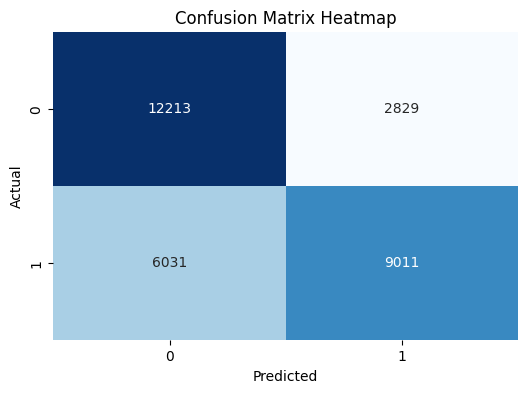

In [99]:
# confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [100]:
# evaluation metrics
evaluation['gb_classifier'] = {
    'classification_report': classification_report(y_test, y_pred),
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1_score': f1_score(y_test, y_pred)
}

## 6.5. Random Forest Classifier

In [101]:
# defining classifier
rf_classifier = RandomForestClassifier(n_estimators=300,max_depth=3)

In [102]:
# model fitting
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=300)

In [103]:
# model prediction
y_pred = rf_classifier.predict(X_test)

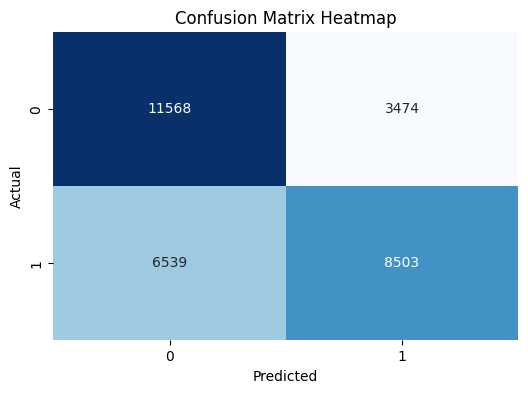

In [104]:
# confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [105]:
# evaluation metrics
evaluation['rf_classifier'] = {
    'classification_report': classification_report(y_test, y_pred),
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1_score': f1_score(y_test, y_pred)
}

## 6.6.Voting Classifier

In [106]:
# defining classifier
mnb = MultinomialNB()
lr = LogisticRegression(max_iter=5000)
svc = SVC(max_iter=5000)
vot_classifier = VotingClassifier(estimators=[('mnb', mnb),('lr', lr),('svc', svc)])

In [107]:
# model fitting
vot_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()),
                             ('lr', LogisticRegression(max_iter=5000)),
                             ('svc', SVC(max_iter=5000))])

In [108]:
# model prediction
y_pred = vot_classifier.predict(X_test)

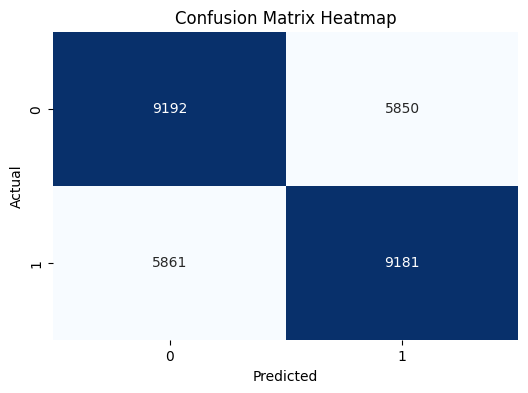

In [109]:
# confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [110]:
# evaluation metrics
evaluation['vot_classifier'] = {
    'classification_report': classification_report(y_test, y_pred),
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1_score': f1_score(y_test, y_pred)
}

## 6.7. Models Comparison

In [111]:
# classification reports of all models
for key, value in evaluation.items():
    print(key)
    print(value['classification_report'])

dt_classifier
              precision    recall  f1-score   support

           0       0.62      0.80      0.69     15042
           1       0.71      0.50      0.59     15042

    accuracy                           0.65     30084
   macro avg       0.66      0.65      0.64     30084
weighted avg       0.66      0.65      0.64     30084

bg_classifier
              precision    recall  f1-score   support

           0       0.62      0.80      0.69     15042
           1       0.71      0.50      0.59     15042

    accuracy                           0.65     30084
   macro avg       0.66      0.65      0.64     30084
weighted avg       0.66      0.65      0.64     30084

adab_classifier
              precision    recall  f1-score   support

           0       0.70      0.78      0.74     15042
           1       0.75      0.67      0.71     15042

    accuracy                           0.72     30084
   macro avg       0.73      0.72      0.72     30084
weighted avg       0.73      0

In [112]:
# evaluation metrics of all models
for key, value in evaluation.items():
    print(key)
    print(f"accuracy: {value['accuracy']}")
    print(f"precision: {value['precision']}")
    print(f"recall: {value['recall']}")
    print(f"f1-score: {value['f1_score']}")
    print("===========================================")

dt_classifier
accuracy: 0.6488166467225103
precision: 0.7107616985217965
recall: 0.501861454593804
f1-score: 0.5883178116354284
bg_classifier
accuracy: 0.6488166467225103
precision: 0.7107616985217965
recall: 0.501861454593804
f1-score: 0.5883178116354284
adab_classifier
accuracy: 0.7230421486504455
precision: 0.751085166891184
recall: 0.667198510836325
f1-score: 0.7066610336572314
gb_classifier
accuracy: 0.7054912910517218
precision: 0.7610641891891892
recall: 0.5990559765988566
f1-score: 0.6704114277211517
rf_classifier
accuracy: 0.6671652705757213
precision: 0.7099440594472739
recall: 0.5652838718255551
f1-score: 0.6294089344535327
vot_classifier
accuracy: 0.6107233080707353
precision: 0.6108043377020823
recall: 0.6103576652040952
f1-score: 0.6105809197619126


In [113]:
# convert evaluation data into dataframe
df_evaluation = pd.DataFrame({key: {
    'accuracy': value['accuracy'],
    'precision': value['precision'],
    'recall': value['recall'],
    'f1_score': value['f1_score']
} for key, value in evaluation.items()})

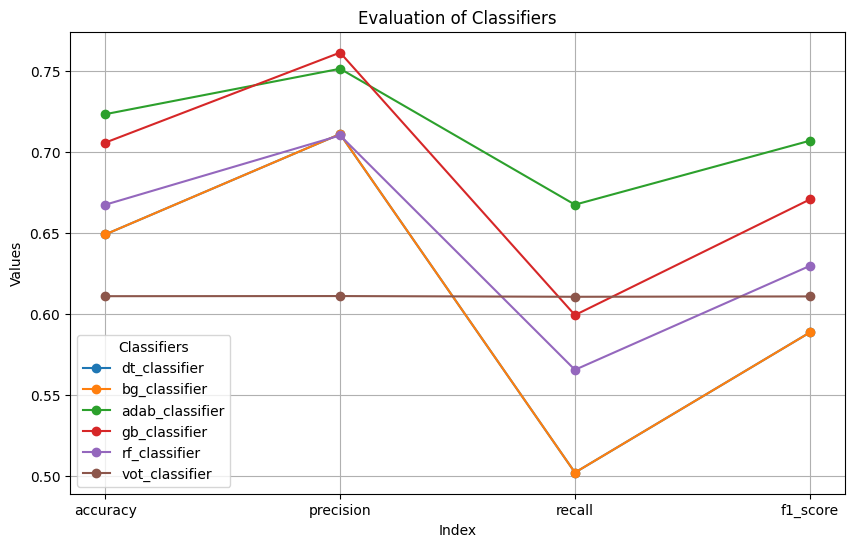

In [114]:
# show line plots for all classifiers
plt.figure(figsize=(10, 6))
for column in df_evaluation.columns:
    plt.plot(df_evaluation.index, df_evaluation[column], marker='o', label=column)

plt.title('Evaluation of Classifiers')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(title='Classifiers')
plt.grid(True)
plt.show()

**Results:** Adaboost Classifier show highest results in evaluation metrics with second lowest variation.

# 7. Model Testing

In [115]:
# using adaboost classifier for prediction
df_test['is_promoted'] = adab_classifier.predict(df_test[important_features])

In [116]:
# top 10 elements with is_promoted
df_test.head(10)

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,Analytics,Finance,...,region_4,region_5,region_6,region_7,region_8,region_9,other,referred,sourcing,is_promoted
0,0.5,0,0.000000,0.100,0.50,0.000000,0,0.633333,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.5,1,0.000000,0.275,0.50,0.111111,0,0.200000,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0.5,0,0.000000,0.275,0.00,0.083333,0,0.133333,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.5,1,0.222222,0.275,0.25,0.222222,0,0.433333,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.5,0,0.000000,0.250,0.75,0.166667,0,0.366667,0,1,...,0,0,0,0,0,0,0,0,1,0
5,0.5,0,0.000000,0.400,0.50,0.027778,0,0.483333,0,0,...,0,0,0,1,0,0,0,0,1,0
6,0.5,0,0.000000,0.325,1.00,0.055556,0,0.300000,0,1,...,0,0,0,0,0,0,1,0,0,1
7,0.5,0,0.111111,0.400,0.50,0.055556,0,0.766667,1,0,...,0,0,0,0,0,0,0,0,1,1
8,1.0,0,0.000000,0.775,0.75,0.277778,0,0.600000,0,0,...,0,0,0,1,0,0,1,0,0,0
9,0.5,0,0.000000,0.225,1.00,0.027778,0,0.616667,0,0,...,0,0,0,0,0,0,0,0,1,1


In [117]:
# checking value counts
df_test['is_promoted'].value_counts()

is_promoted
0    17551
1     5939
Name: count, dtype: int64

# 8. Model Saving

In [118]:
# saving model
joblib.dump(adab_classifier, 'final_model.sav')

['final_model.sav']

# References

- “HR Analytics: Employee Promotion Data.” Www.kaggle.com, www.kaggle.com/datasets/arashnic/hr-ana.
- Nature.com, 2024, www.nature.com/nature-index/article/image/615b9add4e229320e10253a6.